In [ ]:
from google.colab import drive
drive.mount("/content/mydrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mydrive


In [ ]:
!cp /content/mydrive/My\ Drive/heart_attack/data.zip ./

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
  inflating: heart.csv               


In [ ]:
path= "/content/heart.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data= pd.read_csv(path)

# Preprocessing 

## EDA

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data["target"].value_counts(normalize= True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [ ]:
data= data.sample(frac=1).reset_index()

In [ ]:
for c in data.columns:
  n= len(data[c].unique())
  print("{} ==>> {} unique values".format(c, n))

index ==>> 303 unique values
age ==>> 41 unique values
sex ==>> 2 unique values
cp ==>> 4 unique values
trestbps ==>> 49 unique values
chol ==>> 152 unique values
fbs ==>> 2 unique values
restecg ==>> 3 unique values
thalach ==>> 91 unique values
exang ==>> 2 unique values
oldpeak ==>> 40 unique values
slope ==>> 3 unique values
ca ==>> 5 unique values
thal ==>> 4 unique values
target ==>> 2 unique values


In [ ]:
data= data.drop("index", axis= 1)

In [ ]:
cont_col= [col for col in data.columns if len(data[col].unique())>10]

In [ ]:
dis_col= [col for col in data.columns if len(data[col].unique())<10]

In [ ]:
dis_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

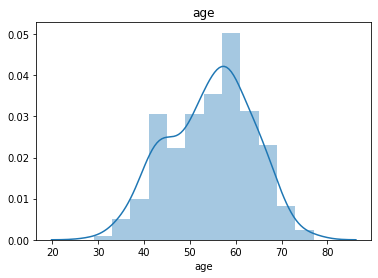

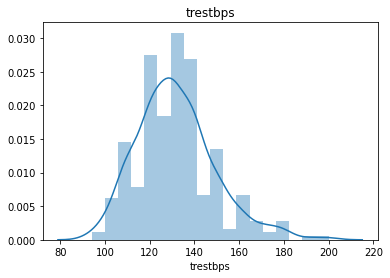

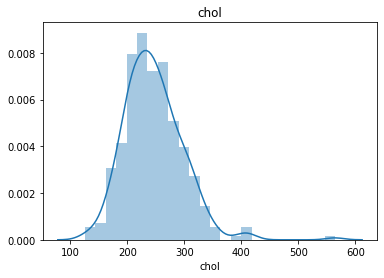

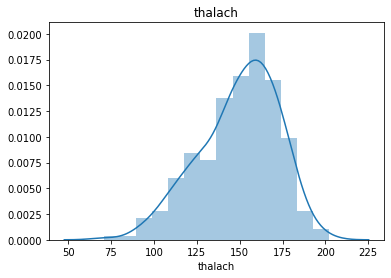

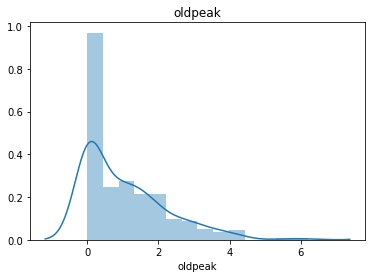

In [ ]:
for col in cont_col:
  sns.distplot(data[col])
  plt.xlabel(col)
  plt.title(col)
  plt.show()

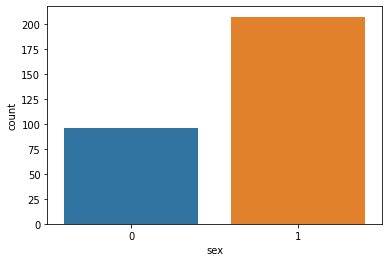

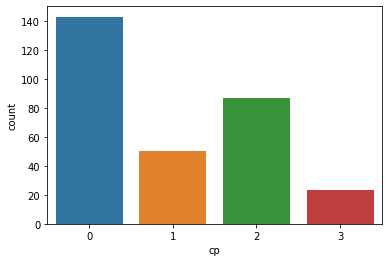

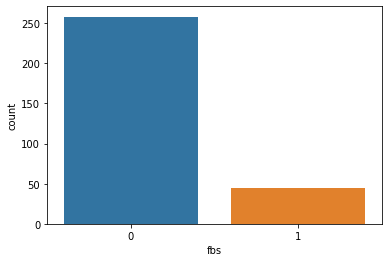

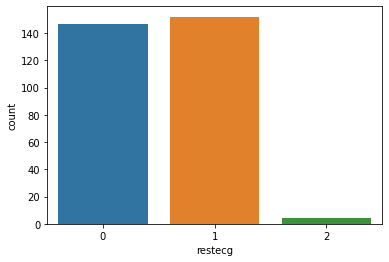

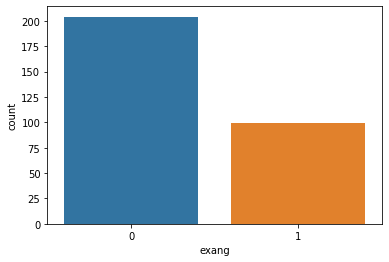

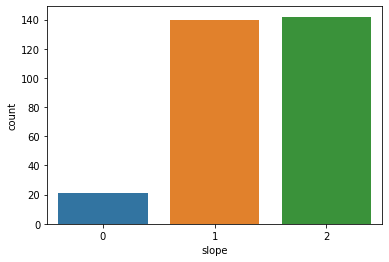

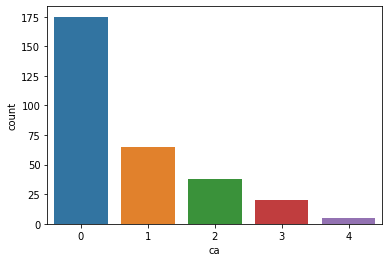

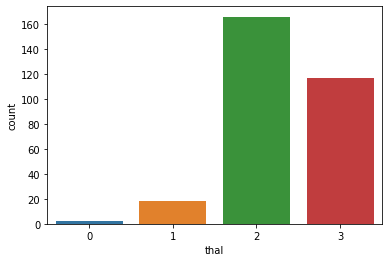

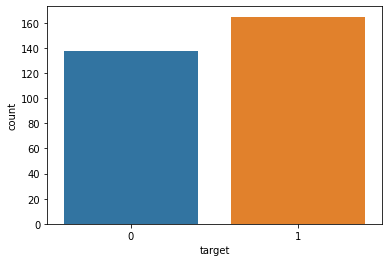

In [ ]:
for col in dis_col:
  sns.countplot(data[col])
  plt.show()

### Feature transformation

In [ ]:
x= data.drop("target", axis=1)

In [ ]:
y= data["target"]

In [ ]:
x["chol"]= np.log(data["chol"])

In [ ]:
x.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
y

0      1
1      1
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    1
Name: target, Length: 303, dtype: int64

### Feature Selection

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
data= pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

In [ ]:
abs(data.corr()["target"])> 0.2

age          True
sex          True
cp           True
trestbps    False
chol        False
fbs         False
restecg     False
thalach      True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
target       True
Name: target, dtype: bool

In [ ]:
x_n= data[["age", "sex", "cp", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_n,y, test_size= 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier(n_estimators=35)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred= model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [ ]:
accuracy_score(y_test, pred)

0.8360655737704918

In [ ]:
f1_score(y_test, pred)

0.8529411764705881

In [ ]:
confusion_matrix(y_test, pred)

array([[22,  8],
       [ 2, 29]])